## AMV E-COMMERCE

**1: Definicion de librerias**

In [2]:
import numpy as np
import matplotlib.pylab as plt
from math import exp,log,sqrt,pi,sin
import scipy.stats as sts
import pandas as pd
%matplotlib inline
import re

**2: Importacion de datos y limpieza**

In [3]:
ruta = 'C:/Users/1063949520/Marcos/Datos AMV/'
nombre='data.csv'
df = pd.read_csv(ruta+nombre,encoding="iso-8859-1",dtype={'CustomerID':str}).reset_index(drop=True)

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [6]:
df.describe(percentiles=[0.01,0.02,0.05,0.95,0.999])

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
1%,-2.000000,0.190000
2%,1.000000,0.290000
5%,1.000000,0.420000
50%,3.000000,2.080000
95%,29.000000,9.950000
99.9%,468.920000,205.559800


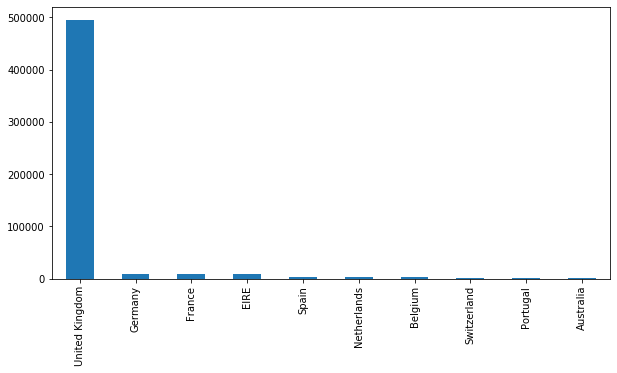

In [7]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=[10,5])

**2.1 Eliminar Valores Duplicados**

In [8]:
df.duplicated().sum()

5268

In [9]:
duplicates = df[df.duplicated(keep=False)]

In [10]:
df.drop_duplicates(keep="first",inplace=True) 

In [11]:
df.duplicated().sum()

0

**2.2 Valores Missings**

In [12]:
Missings=df.isnull().sum()
Missings/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [13]:
df = df[~df['CustomerID'].isnull()]

In [14]:
df.shape

(401604, 8)

In [15]:
df.shape[0]/541909

0.7410912164219454

In [16]:
Missings=df.isnull().sum()
Missings/df.shape[0]*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

**2.3 Filtros**

In [17]:
df.shape[0]/541909

0.7410912164219454

**2.4 Eliminar Descripciones atipicas**

In [18]:
df.shape[0]/541909

0.7410912164219454

In [19]:
df.describe(percentiles=[0.01,0.02,0.25,0.5,0.75,0.95,0.999])

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
1%,-2.000000,0.210000
2%,-1.000000,0.290000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
95%,36.000000,8.500000


**3 Ingenieria de datos**

In [20]:
var=['InvoiceNo']
X=df[var].copy()
X=X.drop_duplicates()

In [21]:
pd.DataFrame([{df['CustomerID'].nunique(),len(df.groupby(["CustomerID", "InvoiceNo"], as_index=False).count()),
               len(X.loc[X['InvoiceNo'].str.contains('C', regex=True)]),len(X.loc[X['InvoiceNo'].str.contains('C', regex=True)])/len(df.groupby(["CustomerID", "InvoiceNo"], as_index=False).count())}],
             columns=['PCT de cancelacion','Cancelaciones','Clientes','Compras'],index=['Total'])

,PCT de cancelacion,Cancelaciones,Clientes,Compras
Total,0.164669,3654,4372,22190


In [22]:
df['Total']=df['Quantity']*df['UnitPrice']

In [23]:
df['Total'].sum()

8278519.4240000015

In [24]:
df['Week']=pd.to_datetime(df['InvoiceDate']).dt.date.map(lambda x:x.strftime('%V')).astype(int)
df['Day']=pd.to_datetime(df['InvoiceDate']).dt.date.map(lambda x:x.strftime('%d')).astype(int)
df['Month']=pd.to_datetime(df['InvoiceDate']).dt.date.map(lambda x:x.strftime('%m')).astype(int)
df['Year']=pd.to_datetime(df['InvoiceDate']).dt.date.map(lambda x:x.strftime('%y')).astype(int)
df['Periodo2']=(pd.to_datetime(df['InvoiceDate']).dt.date.map(lambda x:x.strftime('%y%m%d ')).astype(int))+20000000

In [25]:
df['Periodo']=(df['Year']+2000)*100+df['Month']

In [26]:
pd.DataFrame(df.groupby(["Periodo"],as_index=False)['Total'].agg(['sum'])).reset_index()

,Periodo,sum
0,201012,552372.860
1,201101,473731.900
2,201102,435534.070
3,201103,578576.210
4,201104,425222.671
5,201105,647011.670
6,201106,606862.520
7,201107,573112.321
8,201108,615078.090
9,201109,929356.232


In [27]:
pd.DataFrame(df.groupby(["Periodo"],as_index=False)['Quantity'].agg(['sum'])).reset_index()

,Periodo,sum
0,201012,295177
1,201101,268755
2,201102,262243
3,201103,343095
4,201104,277730
5,201105,367115
6,201106,356239
7,201107,361359
8,201108,385865
9,201109,536350


In [28]:
var=['CustomerID','Periodo','InvoiceNo']
X=df[var].copy()
X=X.drop_duplicates()

In [29]:
pd.DataFrame(X.groupby(["Periodo"],as_index=False)['InvoiceNo'].agg(['count'])).reset_index()

,Periodo,count
0,201012,1708
1,201101,1236
2,201102,1202
3,201103,1619
4,201104,1384
5,201105,1849
6,201106,1707
7,201107,1593
8,201108,1544
9,201109,2078


In [ ]:
pd.DataFrame(AUX.groupby(["CustomerID"],as_index=False)['Total'].agg(['count','min','max','mean','sum'])).reset_index().rename(columns={"min": "Min_Compras_cash","max": "Max_Compras_cash","mean": "Mean_Compras_cash","sum": "Total_Compras_cash"})

In [67]:
def freq(df,var):
    for v in var:
        aux = df[v].value_counts().sort_index().to_frame()
        aux.rename(columns={v:'fa'},inplace=True)
        aux['fr'] = aux['fa']/aux['fa'].sum()
        aux['faa'] = aux['fa'].cumsum()
        aux['fra'] = aux['fr'].cumsum()
        print('****%s****\n'%v)
        print(aux)
        print('\n')

In [68]:
var=['Country']

In [69]:
freq(df,var)

****Country****

                          fa        fr     faa       fra
Australia               1258  0.003132    1258  0.003132
Austria                  401  0.000998    1659  0.004131
Bahrain                   17  0.000042    1676  0.004173
Belgium                 2069  0.005152    3745  0.009325
Brazil                    32  0.000080    3777  0.009405
Canada                   151  0.000376    3928  0.009781
Channel Islands          757  0.001885    4685  0.011666
Cyprus                   611  0.001521    5296  0.013187
Czech Republic            30  0.000075    5326  0.013262
Denmark                  389  0.000969    5715  0.014230
EIRE                    7475  0.018613   13190  0.032843
European Community        61  0.000152   13251  0.032995
Finland                  695  0.001731   13946  0.034726
France                  8475  0.021103   22421  0.055829
Germany                 9480  0.023605   31901  0.079434
Greece                   146  0.000364   32047  0.079798
Iceland       

In [ ]:
pd.DataFrame(df.groupby(["CustomerID"],as_index=False)['Total'].agg(['count','min','max','mean','sum'])).reset_index().rename(columns={"min": "Min_Compras_cash","max": "Max_Compras_cash","mean": "Mean_Compras_cash","sum": "Total_Compras_cash"})

In [ ]:
pd.DataFrame([{df['CustomerID'].nunique(),len(df.groupby(["CustomerID", "InvoiceNo"], as_index=False).count()),
               len(X.loc[X['InvoiceNo'].str.contains('C', regex=True)]),len(X.loc[X['InvoiceNo'].str.contains('C', regex=True)])/len(df.groupby(["CustomerID", "InvoiceNo"], as_index=False).count())}],
             columns=['PCT de cancelacion','Cancelaciones','Clientes','Compras'],index=['Total'])